<a href="https://colab.research.google.com/github/mnslarcher/cs224w-machine-learning-with-graphs/blob/main/notebooks/01-introduction-machine-learning-for-graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
from typing import Optional

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def seed_everything(seed: Optional[int] = None) -> None:
    random.seed(seed)        
    np.random.seed(seed)

seed_everything(42)

# Components of a Network

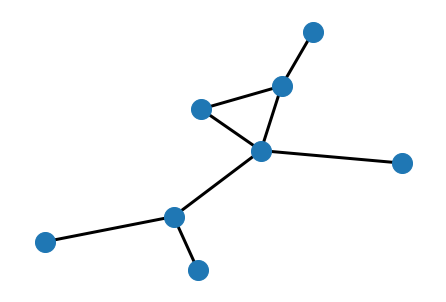

In [3]:
edge_list = [(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (5, 6), (5, 7)]
G = nx.Graph(edge_list)
nx.draw(G, node_color="tab:blue", node_size=400, width=3)

In [4]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7))

In [5]:
G.edges

EdgeView([(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (5, 6), (5, 7)])

# Directed vs. Unidirected Graphs

## Undirected

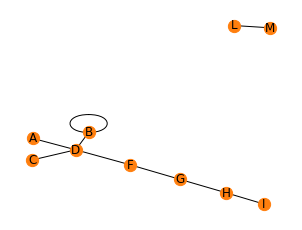

In [6]:
edge_list = [
    ("A", "D"), 
    ("B", "B"), 
    ("B", "D"), 
    ("C", "D"), 
    ("C", "D"),
    ("D", "F"), 
    ("F", "G"), 
    ("G", "H"), 
    ("H", "I"),
    ("L", "M")
]
G = nx.Graph(edge_list)

plt.figure(figsize=(4, 3))
# NetworkX does not represent multiple edges between two nodes well
nx.draw(G, node_color="tab:orange", node_size=150, with_labels=True)

## Directed

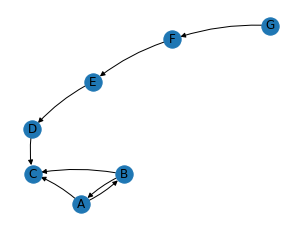

In [7]:
edge_list = [("A", "B"), ("A", "C"), ("B", "A"), ("B", "C"), ("D", "C"), ("E", "D"), ("F", "E"), ("G", "F")]
G = nx.MultiDiGraph(edge_list)

plt.figure(figsize=(4, 3))
nx.draw(G, node_color="tab:blue", with_labels=True, connectionstyle="arc3, rad = 0.1")

# Heterogeneous Graphs

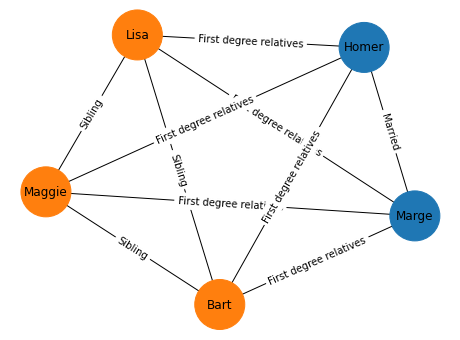

In [8]:
edge_list = [
    ("Marge", "Homer", {"relation_type": "Married"}),
    ("Marge", "Lisa", {"relation_type": "First degree relatives"}),
    ("Marge", "Bart", {"relation_type": "First degree relatives"}),
    ("Marge", "Maggie", {"relation_type": "First degree relatives"}),
    ("Homer", "Lisa", {"relation_type": "First degree relatives"}),
    ("Homer", "Bart", {"relation_type": "First degree relatives"}),
    ("Homer", "Maggie", {"relation_type": "First degree relatives"}),
    ("Lisa", "Bart", {"relation_type": "Sibling"}),
    ("Lisa", "Maggie", {"relation_type": "Sibling"}),
    ("Bart", "Maggie", {"relation_type": "Sibling"}),
]
G = nx.Graph(edge_list)
node_attributes = {
    "Marge": {"node_type": "Adult"},
    "Homer": {"node_type": "Adult"},
    "Lisa": {"node_type": "Child"},
    "Bart": {"node_type": "Child"},
    "Maggie": {"node_type": "Child"},
}
nx.set_node_attributes(G, node_attributes)

node_type_to_color = {"Adult": "tab:blue", "Child": "tab:orange"}
node_color = [node_type_to_color[node_type] for label, node_type in nx.get_node_attributes(G, "node_type").items()]
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, "relation_type")

plt.figure(figsize=(8, 6))
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, pos=pos, node_color=node_color, node_size=2500, with_labels=True)

# Node Degrees

## Undirected

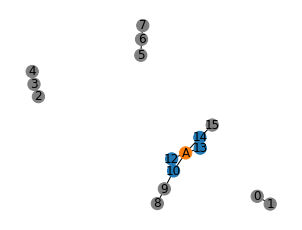


Node degree, kA: 4
Avg. degree: 1.75


In [9]:
edge_list = [
    (0, 1),
    (2, 3),
    (3, 4),
    (5, 6),
    (6, 7),
    (8, 9),
    (9, 10),
    (10, "A"),
    (10, 12),
    ("A", 12),
    ("A", 13),
    ("A", 14),
    (13, 14),
    (14, 15),
]
G = nx.Graph(edge_list)

label_to_color = {10: "tab:blue", "A": "tab:orange", 12: "tab:blue", 13: "tab:blue", 14: "tab:blue"}
node_color = [label_to_color.get(node, "tab:grey") for node in G.nodes()]

plt.figure(figsize=(4, 3))
nx.draw(G, node_size=150, node_color=node_color, with_labels=True)
plt.show()

avg_degree = 2 * G.number_of_edges() / G.number_of_nodes()

print(f"\nNode degree, kA: {G.degree['A']}")
print(f"Avg. degree: {avg_degree:.2f}")

## Directed

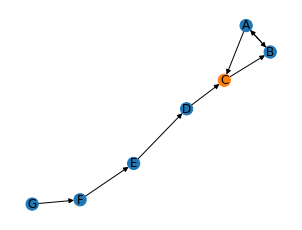


Node in-degree, kC: 2
Node out-degree, kC: 1
Node degree, kC: 3
Avg. degree: 1.14


In [10]:
edge_list = [("A", "B"), ("A", "C"), ("B", "A"), ("C", "B"), ("D", "C"), ("E", "D"), ("F", "E"), ("G", "F")]
G = nx.DiGraph(edge_list)

label_to_color = {"C": "tab:orange"}
node_color = [label_to_color.get(node, "tab:blue") for node in G.nodes()]

plt.figure(figsize=(4, 3))
nx.draw(G, node_size=150, node_color=node_color, with_labels=True)
plt.show()

avg_degree = G.number_of_edges() / G.number_of_nodes()

print(f"\nNode in-degree, kC: {G.in_degree['C']}")
print(f"Node out-degree, kC: {G.out_degree['C']}")
print(f"Node degree, kC: {G.degree['C']}")
print(f"Avg. degree: {avg_degree:.2f}")

# Bipartite Graph

In [11]:
def draw_bipartite(
    G: nx.Graph, 
    node1_color : str = "tab:orange", 
    node2_color : str = "tab:blue", 
    node1_shape : str = "o", 
    node2_shape : str = "s",
    set1_name : str = "U",
    set2_name : str = "V",
    text_size : int = 16,
    fontweight: str = "bold",
) -> None:
    U, V = nx.bipartite.sets(G)
    len_U = len(U)
    len_V = len(V)
    len_max = max(len_U, len_V)
    offset = (len_U - len_V) / 2

    pos = dict()
    pos.update((n, (1, i)) for i, n in enumerate(sorted(U, reverse=True), 1)) # put nodes from U at x=1
    pos.update((n, (2, i + offset)) for i, n in enumerate(sorted(V, reverse=True), 1)) # put nodes from V at x=2

    nx.draw_networkx_nodes(U, pos=pos, node_color="tab:orange", node_shape=node1_shape)
    nx.draw_networkx_nodes(V, pos=pos, node_color="tab:blue", node_shape=node2_shape)
    nx.draw_networkx_labels(G, pos=pos)
    nx.draw_networkx_edges(G, pos=pos, width=2)

    plt.text(0.95, len_max + 0.75, set1_name, size=text_size, fontweight=fontweight)
    plt.text(1.95, len_max + 0.75, set2_name, size=text_size, fontweight=fontweight)

    plt.axis("off")

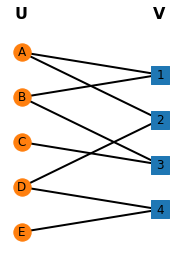

In [12]:
G = nx.Graph()
# Add nodes with the node attribute "bipartite"
G.add_nodes_from(["A", "B", "C", "D", "E"], bipartite=0)
G.add_nodes_from([1, 2, 3, 4], bipartite=1)
# Add edges only between nodes of opposite node sets
G.add_edges_from([("A", 1), ("A", 2), ("B", 1), ("B", 3), ("C", 3), ("D", 2), ("D", 4), ("E", 4)])

plt.figure(figsize=(3, 4))
draw_bipartite(G)
plt.show()

# Folded/Projected Bipartite Graphs

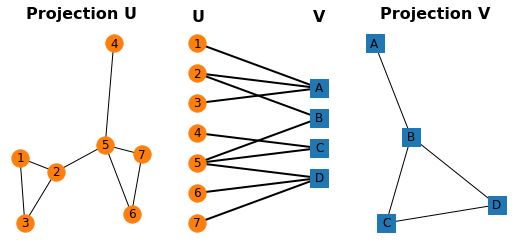

In [13]:
G = nx.Graph()
# Add nodes with the node attribute "bipartite"
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7], bipartite=0)
G.add_nodes_from(["A", "B", "C", "D"], bipartite=1)
# Add edges only between nodes of opposite node sets
G.add_edges_from([(1, "A"), (2, "A"), (2, "B"), (3, "A"), (4, "C"), (5, "B"), (5, "C"), (5, "D"), (6, "D"), (7, "D")])

U, V = nx.bipartite.sets(G)
U_proj = nx.algorithms.bipartite.projected_graph(G, V)
V_proj = nx.algorithms.bipartite.projected_graph(G, U)

plt.figure(figsize=(9, 4))

plt.subplot(131)
plt.title("Projection U", size=16, fontweight="bold")
nx.draw(V_proj, with_labels=True, node_color="tab:orange", node_shape="o")

plt.subplot(132)
draw_bipartite(G)

plt.subplot(133)
plt.title("Projection V", size=16, fontweight="bold")
nx.draw(U_proj, with_labels=True, node_color="tab:blue", node_shape="s")

plt.show()

# Representing Graphs: Adjacency Matrix

## Undirected

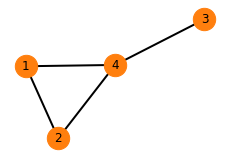


A:
[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]

ki: [[2 2 3 1]]
kj: [[2 2 3 1]]
# of edges (L): 4.0


In [14]:
edge_list = [(1, 2), (1, 4), (2, 4), (4, 3)]
G = nx.Graph(edge_list)
A = nx.adjacency_matrix(G).todense()
ki = A.sum(axis=0).flatten()
kj = A.sum(axis=1).flatten()
L = 0.5 * ki.sum()

plt.figure(figsize=(3, 2))
nx.draw(G, node_color="tab:orange", node_size=500, width=2, with_labels=True)
plt.show()

print(f"\nA:\n{A}")
print(f"\nki: {ki}")
print(f"kj: {kj}")
print(f"# of edges (L): {L}")

## Directed

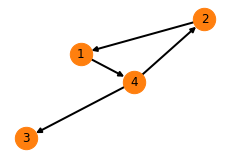


A:
[[0 1 0 0]
 [0 0 1 1]
 [1 0 0 0]
 [0 0 0 0]]

ki_out: [[1 2 1 0]]
kj_in: [[1 1 1 1]]
# of edges (L): 4


In [15]:
edge_list = [(1, 4), (2, 1), (4, 2), (4, 3)]
G = nx.DiGraph(edge_list)
A = nx.adjacency_matrix(G).todense()
ki_out = A.sum(axis=1).flatten()
kj_in = A.sum(axis=0).flatten()
L = kj_in.sum()

plt.figure(figsize=(3, 2))
nx.draw(G, node_color="tab:orange", node_size=500, width=2, with_labels=True)
plt.show()

print(f"\nA:\n{A}")
print(f"\nki_out: {ki_out}")
print(f"kj_in: {kj_in}")
print(f"# of edges (L): {L}")

# Representing Graphs: Edge list

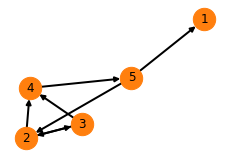


Edge list: [(2, 3), (2, 4), (3, 2), (3, 4), (4, 5), (5, 2), (5, 1)]


In [16]:
edge_list = [(2, 3), (2, 4), (3, 2), (3, 4), (4, 5), (5, 2), (5, 1)]
G = nx.DiGraph(edge_list)

plt.figure(figsize=(3, 2))
nx.draw(G, node_color="tab:orange", node_size=500, width=2, with_labels=True)
A = nx.adjacency_matrix(G)
plt.show()

print(f"\nEdge list: {G.edges}")

# Representing Graphs: Adjacency list

In [17]:
def print_adjacency_list(G: nx.Graph) -> None:
    for item in sorted(nx.generate_adjlist(G)):
        item = item.split(" ")
        key = item[0]
        values = ", ".join(item[1:])
        print(f"{key}: {values}")

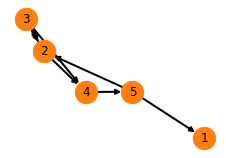


1: 
2: 3, 4
3: 2, 4
4: 5
5: 2, 1


In [18]:
edge_list = [(2, 3), (2, 4), (3, 2), (3, 4), (4, 5), (5, 2), (5, 1)]
G = nx.DiGraph(edge_list)

plt.figure(figsize=(3, 2))
nx.draw(G, node_color="tab:orange", node_size=500, width=2, with_labels=True)
plt.show()

print()
print_adjacency_list(G)

# More Types of Graphs

## Unweighted
(undirected)

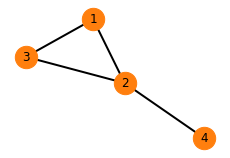


A:
[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 0]]

Avg. degree: 2.00


In [19]:
edge_list = [(1, 2), (1, 3), (2, 3), (2, 4)]
G = nx.Graph(edge_list)
A = nx.adjacency_matrix(G).todense()
E = A.sum() / 2
avg_degree = 2 * E / G.number_of_nodes()

plt.figure(figsize=(3, 2))
nx.draw(G, node_color="tab:orange", node_size=500, width=2, with_labels=True)
plt.show()

print(f"\nA:\n{A}")
print(f"\nAvg. degree: {avg_degree:.2f}")

## Weighted
(undirected)

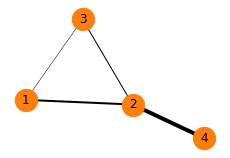


A:
[[0.  2.  0.5 0. ]
 [2.  0.  1.  4. ]
 [0.5 1.  0.  0. ]
 [0.  4.  0.  0. ]]

Avg. degree: 3.75


In [20]:
edge_list = [(1, 2, {"weight": 2}), (1, 3, {"weight": 0.5}), (2, 3, {"weight": 1}), (2, 4, {"weight": 4})]
G = nx.Graph(edge_list)
A = nx.adjacency_matrix(G).todense()
E = A.sum() / 2
avg_degree = 2 * E / G.number_of_nodes()

width = list(nx.get_edge_attributes(G, "weight").values())

plt.figure(figsize=(3, 2))
nx.draw(G, node_color="tab:orange", node_size=500, width=width, with_labels=True)
plt.show()

print(f"\nA:\n{A}")
print(f"\nAvg. degree: {avg_degree:.2f}")

## Self-edges (self-loops)
(undirected)

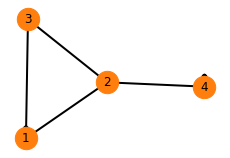


A:
[[1 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 1]]

Avg. degree: 3.00


In [21]:
edge_list = [(1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (4, 4)]
G = nx.Graph(edge_list)
A = nx.adjacency_matrix(G).todense()
E = 0.5 * (A.sum() + np.diagonal(A).sum())
avg_degree = 2 * E / G.number_of_nodes()

plt.figure(figsize=(3, 2))
nx.draw(G, node_color="tab:orange", node_size=500, width=2, with_labels=True)
plt.show()

print(f"\nA:\n{A}")
print(f"\nAvg. degree: {avg_degree:.2f}")

## Multigraph
(undirected)

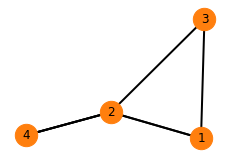


A:
[[0 2 1 0]
 [2 0 1 3]
 [1 1 0 0]
 [0 3 0 0]]

Avg. degree: 3.50


In [22]:
edge_list = [(1, 2), (1, 2), (1, 3), (2, 3), (2, 4), (2, 4), (2, 4)]
G = nx.MultiGraph(edge_list)
A = nx.adjacency_matrix(G).todense()
E = 0.5 * A.sum()
avg_degree = 2 * E / G.number_of_nodes()

plt.figure(figsize=(3, 2))
nx.draw(G, node_color="tab:orange", node_size=500, width=2, with_labels=True)
plt.show()

print(f"\nA:\n{A}")
print(f"\nAvg. degree: {avg_degree:.2f}")